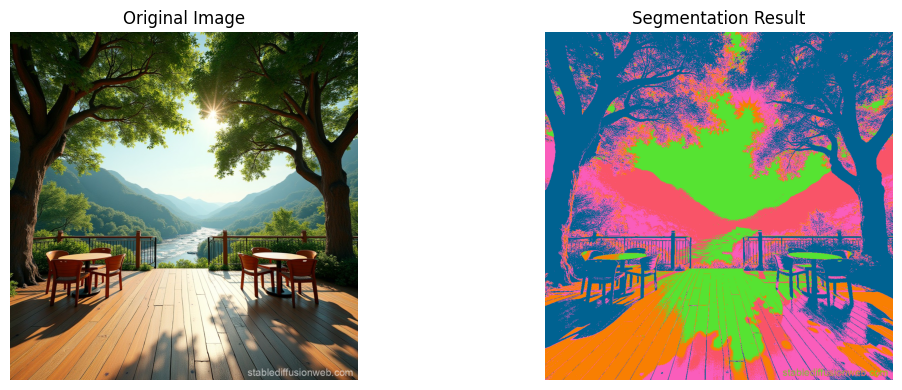

In [ ]:
import sys
import numpy as np
import cv2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    """Load and preprocess image for feature extraction."""
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not load image at {image_path}")

    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Store original dimensions
    original_shape = image.shape

    # Resize for feature extraction
    resized = cv2.resize(image, (224, 224))

    # Expand dimensions and preprocess
    img_array = np.expand_dims(resized, axis=0)
    preprocessed = preprocess_input(img_array)

    return preprocessed, image, original_shape

def extract_features(preprocessed_image):
    """Extract features using pre-trained ResNet50."""
    # Load model without top layer
    model = ResNet50(weights='imagenet', include_top=False)

    # Extract features
    features = model.predict(preprocessed_image)

    return features

def perform_segmentation(image, n_segments=5):
    """Perform K-means clustering on pixel values."""
    # Reshape image to 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_segments, random_state=42)
    labels = kmeans.fit_predict(pixels)

    return labels

def create_segmentation_map(segments, original_shape, n_segments):
    """Create colored segmentation map."""
    # Generate random colors for segments
    colors = np.random.randint(0, 255, size=(n_segments, 3), dtype=np.uint8)

    # Create segmentation map
    segmentation_map = colors[segments].reshape(original_shape)

    return segmentation_map

def main():
    """Main function to perform image segmentation."""
    image_path = '/content/segmentation.jpg'
    n_segments = 5

    try:
        # Load and preprocess image
        preprocessed, original_image, original_shape = load_and_preprocess_image(image_path)

        # Perform segmentation directly on pixel values
        segments = perform_segmentation(original_image, n_segments)

        # Create colored segmentation map
        segmentation_map = create_segmentation_map(segments, original_shape, n_segments)

        # Display results
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(segmentation_map)
        plt.title('Segmentation Result')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error: {str(e)}")
        sys.exit(1)

if __name__ == "__main__":
    main()